# Bit By Bit ORE

Bayes Vulnerability

In [2]:
import collections
import math
from math import floor, log2
import numpy as np
import pandas as pd
from itertools import combinations # for ki_combo
from scipy.special import perm, binom # for nPk #binom for int seq tests
from sympy.utilities.iterables import partitions
from sympy.functions.combinatorial.numbers import stirling
from decimal import Decimal
import matplotlib.pyplot as plt 
pd.set_option('precision', 10)
%matplotlib inline

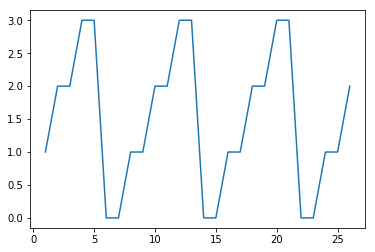

In [99]:
x = np.arange(1, 27)
y = ((np.floor(x/2) + 1) % 4)
plt.plot(x, y)
plt.show()

#### MY ALGORITHM 

_npPos(n1, n2)_: subroutine

MSB: My leftmost bit position between n1 and n2

In [3]:
def npPos(n1, n2):
    xorval = np.bitwise_xor(n1, n2)
    pos = floor(log2(xorval))+1
    return pos

### List all reports for i and k

In [25]:
a = [[1, 2], [1, 3], [2, 1], [2, 3]]
atup = set(map(tuple, a))
b = [[1, 2], [2, 1]]
btup = set(map(tuple, b))
print(list(atup - btup))

[(1, 3), (2, 3)]


In [4]:
def unique_kiG(k,i):
    ki_combo = combinations(range(k),i)
    big_pos_list = []
    for s in ki_combo: #for each set in ki_combo
        pos_list = []
        for n1, n2 in zip(s, s[1:]):
            n1n2_pos = npPos(n1, n2)
            pos_list.append(n1n2_pos)
        if pos_list not in big_pos_list:
            big_pos_list.append(pos_list)
    return big_pos_list

In [11]:
def all_reports(k_limit, i_limit):
    for i in range(i_limit):
        print("i = ", i+1)
        old_set = set()
        for k in range(k_limit):
            print("k = ", k+1)
            if i > k:
                continue
            else:
                current_report = unique_kiG(k+1,i+1)
                current_set = set(map(tuple, current_report))
                new_reports = list(current_set.difference(old_set))
                print(new_reports)
                old_set = current_set

In [12]:
k_limit = 16
i_limit = 16
all_reports = all_reports(k_limit, i_limit)
all_reports

i =  1
k =  1
[()]
k =  2
[]
k =  3
[]
k =  4
[]
k =  5
[]
k =  6
[]
k =  7
[]
k =  8
[]
k =  9
[]
k =  10
[]
k =  11
[]
k =  12
[]
k =  13
[]
k =  14
[]
k =  15
[]
k =  16
[]
i =  2
k =  1
k =  2
[(1,)]
k =  3
[(2,)]
k =  4
[]
k =  5
[(3,)]
k =  6
[]
k =  7
[]
k =  8
[]
k =  9
[(4,)]
k =  10
[]
k =  11
[]
k =  12
[]
k =  13
[]
k =  14
[]
k =  15
[]
k =  16
[]
i =  3
k =  1
k =  2
k =  3
[(1, 2)]
k =  4
[(2, 1)]
k =  5
[(1, 3), (2, 3)]
k =  6
[(3, 1)]
k =  7
[(3, 2)]
k =  8
[]
k =  9
[(3, 4), (2, 4), (1, 4)]
k =  10
[(4, 1)]
k =  11
[(4, 2)]
k =  12
[]
k =  13
[(4, 3)]
k =  14
[]
k =  15
[]
k =  16
[]
i =  4
k =  1
k =  2
k =  3
k =  4
[(1, 2, 1)]
k =  5
[(2, 1, 3), (1, 2, 3)]
k =  6
[(1, 3, 1), (2, 3, 1)]
k =  7
[(2, 3, 2), (3, 1, 2), (1, 3, 2)]
k =  8
[(3, 2, 1)]
k =  9
[(2, 1, 4), (3, 1, 4), (1, 2, 4), (1, 3, 4), (2, 3, 4), (3, 2, 4)]
k =  10
[(2, 4, 1), (1, 4, 1), (3, 4, 1)]
k =  11
[(4, 1, 2), (3, 4, 2), (1, 4, 2), (2, 4, 2)]
k =  12
[(4, 2, 1)]
k =  13
[(4, 1, 3), (3, 4, 3), (2, 

[(1, 4, 2, 1, 3, 2, 1), (4, 2, 1, 3, 1, 2, 1), (1, 2, 4, 2, 3, 2, 1), (3, 1, 2, 4, 3, 2, 1), (3, 1, 4, 1, 3, 2, 1), (1, 2, 4, 1, 3, 2, 1), (2, 1, 4, 3, 1, 2, 1), (3, 1, 4, 2, 3, 2, 1), (2, 1, 3, 4, 3, 2, 1), (1, 3, 4, 3, 1, 2, 1), (1, 2, 3, 4, 3, 2, 1), (2, 4, 2, 3, 1, 2, 1), (1, 4, 1, 2, 3, 2, 1), (2, 3, 4, 2, 3, 2, 1), (3, 4, 2, 1, 3, 2, 1), (3, 2, 4, 3, 1, 2, 1), (3, 4, 1, 3, 1, 2, 1), (3, 2, 1, 4, 3, 2, 1), (2, 4, 1, 2, 3, 2, 1), (1, 4, 2, 3, 1, 2, 1), (2, 3, 4, 1, 3, 2, 1), (4, 1, 2, 3, 1, 2, 1), (1, 2, 4, 3, 1, 2, 1), (2, 1, 4, 1, 3, 2, 1), (1, 3, 1, 4, 3, 2, 1), (1, 3, 2, 4, 3, 2, 1), (2, 3, 1, 4, 3, 2, 1), (1, 3, 4, 1, 3, 2, 1), (2, 1, 4, 2, 3, 2, 1), (3, 2, 4, 1, 3, 2, 1), (3, 1, 4, 3, 1, 2, 1), (2, 4, 2, 1, 3, 2, 1), (1, 3, 4, 2, 3, 2, 1), (2, 3, 4, 3, 1, 2, 1), (3, 2, 4, 2, 3, 2, 1), (4, 1, 2, 1, 3, 2, 1), (1, 2, 1, 4, 3, 2, 1), (1, 4, 1, 3, 1, 2, 1), (2, 4, 1, 3, 1, 2, 1), (3, 4, 1, 2, 3, 2, 1), (3, 4, 2, 3, 1, 2, 1), (2, 3, 2, 4, 3, 2, 1)]
i =  9
k =  1
k =  2
k =  3
k =  

k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
[(1, 2, 1, 3, 1, 2, 1, 4, 1)]
k =  11
[(2, 1, 3, 1, 2, 1, 4, 1, 2), (1, 2, 1, 3, 1, 2, 4, 1, 2), (1, 2, 3, 1, 2, 1, 4, 1, 2), (1, 2, 1, 3, 2, 1, 4, 1, 2), (1, 2, 1, 3, 1, 2, 1, 4, 2)]
k =  12
[(1, 2, 3, 2, 1, 4, 1, 2, 1), (1, 2, 1, 3, 1, 4, 1, 2, 1), (1, 2, 1, 3, 2, 1, 4, 2, 1), (1, 2, 3, 1, 2, 1, 4, 2, 1), (1, 2, 1, 3, 2, 4, 1, 2, 1), (2, 1, 3, 1, 2, 1, 4, 2, 1), (2, 3, 1, 2, 1, 4, 1, 2, 1), (2, 1, 3, 1, 2, 4, 1, 2, 1), (1, 2, 1, 3, 1, 2, 4, 2, 1), (2, 1, 3, 2, 1, 4, 1, 2, 1), (1, 2, 3, 1, 2, 4, 1, 2, 1), (1, 3, 1, 2, 1, 4, 1, 2, 1)]
k =  13
[(2, 1, 3, 1, 2, 1, 4, 2, 3), (1, 2, 1, 3, 1, 4, 2, 1, 3), (2, 3, 1, 2, 1, 4, 2, 1, 3), (1, 2, 3, 1, 2, 4, 1, 2, 3), (2, 1, 3, 1, 2, 4, 2, 1, 3), (2, 1, 3, 1, 2, 1, 4, 1, 3), (2, 1, 3, 2, 1, 4, 2, 1, 3), (2, 3, 2, 1, 4, 1, 2, 1, 3), (1, 2, 3, 2, 1, 4, 2, 1, 3), (1, 3, 1, 2, 1, 4, 2, 1, 3), (1, 3, 1, 2, 4, 1, 2, 1, 3), (1, 2, 1, 3, 2, 1, 4, 1, 3), (1, 2, 1, 3, 2, 1, 4, 2, 3), (1, 2, 1, 3, 1, 2, 1, 4, 3), (

k =  12
k =  13
k =  14
k =  15
[(1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2)]
k =  16
[(1, 2, 1, 3, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1), (1, 2, 1, 3, 1, 2, 1, 4, 2, 1, 3, 1, 2, 1), (1, 2, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1), (2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1), (1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 2, 1), (1, 2, 1, 3, 1, 2, 4, 1, 2, 1, 3, 1, 2, 1), (1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 3, 1, 2, 1)]
i =  16
k =  1
k =  2
k =  3
k =  4
k =  5
k =  6
k =  7
k =  8
k =  9
k =  10
k =  11
k =  12
k =  13
k =  14
k =  15
k =  16
[(1, 2, 1, 3, 1, 2, 1, 4, 1, 2, 1, 3, 1, 2, 1)]


Given i numbers picked from set of k, output number of unique bit patterns.

Example: k = |4| {0, 1, 2, 3} and i = 3. There are 2 different bit patterns

Algorithm:

For set of k:
    * For all ordered subsets of size i: (kCi)
        find all unique patterns (list of lists)
        count number of unique patterns
    * M_{k, i} := count

In [5]:
def unique_ki(k,i):
    ki_combo = combinations(range(k),i)
    big_pos_list = []
    #w = (k-1).bit_length()
    for s in ki_combo: #for each set in ki_combo
        pos_list = []
        for n1, n2 in zip(s, s[1:]):
            n1n2_pos = npPos(n1, n2)
            #n1n2_pos = npPos(n1, n2, w)
            pos_list.append(n1n2_pos)
        if pos_list not in big_pos_list:
            big_pos_list.append(pos_list)
    return len(big_pos_list)

In [5]:
k = 4 # {0-3}
i = 3
u = unique_ki(k,i)
print(u)

2


In [4]:
def all_unique_ki(k,i):
    ki_combo = combinations(range(k),i)
    big_pos_list = []
    w = (k-1).bit_length()
    print("w: ", w)
    for s in ki_combo: #for each set in ki_combo
        pos_list = []
        apl = combinations(s, 2) # all pair list
        for i in apl:
            print("i: ", i)
            n1n2_pos = npPos(i[0], i[1], w)
            print("pos: ", n1n2_pos)
            pos_list.append(n1n2_pos)
        if pos_list not in big_pos_list:
            big_pos_list.append(pos_list)
        print("big list: ", big_pos_list)
    return len(big_pos_list)

In [9]:
k = 4 # {0-3}
i = 3
u = all_unique_ki(k,i)
print(u)

w:  2
i:  (0, 1)
pos:  2
i:  (0, 2)
pos:  1
i:  (1, 2)
pos:  1
big list:  [[2, 1, 1]]
i:  (0, 1)
pos:  2
i:  (0, 3)
pos:  1
i:  (1, 3)
pos:  1
big list:  [[2, 1, 1]]
i:  (0, 2)
pos:  1
i:  (0, 3)
pos:  1
i:  (2, 3)
pos:  2
big list:  [[2, 1, 1], [1, 1, 2]]
i:  (1, 2)
pos:  1
i:  (1, 3)
pos:  1
i:  (2, 3)
pos:  2
big list:  [[2, 1, 1], [1, 1, 2]]
2


bit_pattern_fork is generally what you want to generate M df for given k

In [6]:
def bit_pattern_fork(k, i_limit):
    zero_data = np.zeros(shape=(1,i_limit)) # 1 row for 1 k 
    df = pd.DataFrame(zero_data)
    df.rename_axis('k')

    for i in range(i_limit):
        if i > k:
            continue
        else:
            u = unique_ki(k,i+1)
            print("at ", i+1, " u = ", u)
            df.at[0, i+1] = u
    return df

In [8]:
bpfk8 = bit_pattern_fork(8, 8)
bpfk8

at  1  u =  1
at  2  u =  3
at  3  u =  6
at  4  u =  9
at  5  u =  10
at  6  u =  8
at  7  u =  4
at  8  u =  1


,0,1,2,3,4,5,6,7,8
0,0.0,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0


In [23]:
def all_bit_pattern_fork(k, i_limit):
    zero_data = np.zeros(shape=(1,i_limit)) # 1 row for 1 k 
    df = pd.DataFrame(zero_data)
    df.rename_axis('k')

    for i in range(i_limit):
        if i > k:
            continue
        else:
            u = all_unique_ki(k,i+1)
            df.at[0, i+1] = u
    return df

In [9]:
r30 = [1, 5, 20, 70, 219]
r31 = [1, 5, 20, 70, 220, 629]
r33 = [1, 6, 25, 90, 290, 850, 2286]

In [14]:
def nan_triangle_range(k_start, k_end, i_limit):
    df = pd.DataFrame()
    
    for k in range(k_start, k_end):
        for i in range(i_limit):
            if i > k:
                continue
            else:
                u = unique_ki(k+1,i+1)
                df.at[k+1, i+1] = u
                print("at ", k+1, ", ", i+1, ", u: ", u)
    #df.astype('int64').dtypes
    return df

at  34 ,  1 , u:  1
at  34 ,  2 , u:  6
at  34 ,  3 , u:  26
at  34 ,  4 , u:  95
at  34 ,  5 , u:  310
at  34 ,  6 , u:  920
at  34 ,  7 , u:  2506
at  35 ,  1 , u:  1
at  35 ,  2 , u:  6
at  35 ,  3 , u:  27
at  35 ,  4 , u:  101
at  35 ,  5 , u:  335
at  35 ,  6 , u:  1010
at  35 ,  7 , u:  2796
at  36 ,  1 , u:  1
at  36 ,  2 , u:  6
at  36 ,  3 , u:  27
at  36 ,  4 , u:  102
at  36 ,  5 , u:  341
at  36 ,  6 , u:  1035
at  36 ,  7 , u:  2886
at  37 ,  1 , u:  1
at  37 ,  2 , u:  6
at  37 ,  3 , u:  28
at  37 ,  4 , u:  109
at  37 ,  5 , u:  373
at  37 ,  6 , u:  1156
at  38 ,  1 , u:  1
at  38 ,  2 , u:  6
at  38 ,  3 , u:  28
at  38 ,  4 , u:  110
at  38 ,  5 , u:  380
at  38 ,  6 , u:  1188
at  39 ,  1 , u:  1
at  39 ,  2 , u:  6
at  39 ,  3 , u:  28
at  39 ,  4 , u:  111
at  39 ,  5 , u:  388
at  39 ,  6 , u:  1227
at  40 ,  1 , u:  1
at  40 ,  2 , u:  6
at  40 ,  3 , u:  28
at  40 ,  4 , u:  111
at  40 ,  5 , u:  389
at  40 ,  6 , u:  1235

In [36]:
TEST = bit_pattern_fork(17, 17)
TEST

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,5.0,16.0,42.0,94.0,182.0,306.0,446.0,560.0,600.0,542.0,406.0,246.0,116.0,40.0,9.0,1.0


In [37]:
ALL_TEST = all_bit_pattern_fork(17, 17)
ALL_TEST

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,1.0,5.0,16.0,42.0,94.0,182.0,306.0,446.0,560.0,600.0,542.0,406.0,246.0,116.0,40.0,9.0,1.0


In [38]:
TEST.equals(ALL_TEST)

True

from: http://oeis.org/A122888/b122888.txt

More: http://oeis.org/A122888

Easy for powers of two. Still not sure for other numbers.

In [80]:
i_limit = 128
zero_data = np.zeros(shape=(1,i_limit))
k = 128
dfk128 = pd.DataFrame(data = zero_data)

k128data = [1,
7,
42,
231,
1190,
5810,
27076,
121023,
520626,
2161158,
8674188,
33717798,
127104492,
465186656,
1654567712,
5724109657,
19276691982,
63235476838,
202193902604,
630529937426,
1918685721240,
5699975453208,
16538861330328,
46889696018856,
129941720084724,
352099216348452,
933167213926376,
2419649860753756,
6139795508356336,
15249769931206968,
37082689474605504,
88299837542449211,
205922534541925490,
470403580377218518,
1052739865202421420,
2308394579541000876,
4960056485110615884,
10444663149113877552,
21556188087343544304,
43606650535241977524,
86470010929369456820,
168087152341582505996,
320316653509703214952,
598433620123381367580,
1096112701065558097720,
1968359474068011233984,
3465507464848882770320,
5981936909795494958502,
10123365427909503650820,
16796077769393645860332,
27319881179477673269424,
43563438183878112428604,
68095552181771019219048,
104338806330225800479800,
156702963511532786483328,
230665656998313282638832,
332758877344903064424312,
470414146054889298606984,
651620198208499153653216,
884357654124759992011128,
1175797920306812042810256,
1531288951697383864103376,
1953196204657799313774720,
2439717292075827330588969,
2983834298021067704800530,
3572596910918375024883408,
4186930882293975913528068,
4802131093265771966492898,
5389124040217213574694096,
5916476628092497908794532,
6353001779570056480656168,
6670689101071401730790508,
6847596751005029715784428,
6870302396056798235043564,
6735541681372379855109840,
6450763287133438405906428,
6033486090839390639072568,
5509528280437118654633688,
4910354735850687963225456,
4269922340648207893504650,
3621466817959237896079520,
2994658303353798296459428,
2413463055626582648363272,
1894907883941645009286480,
1448783826074831039391168,
1078179308727067564796480,
780626757264624037919600,
549594693058374474757984,
376060391832441861836064,
249945156296482153634544,
161267115715193552634528,
100945616006331100947840,
61260383059752083617872,
36017594266254772569168,
20500533106971127870784,
11287106734714815832760,
6006142354731148269052,
3086081308763753026236,
1529654659453882338928,
730632091049990904344,
335919146379109483280,
148482558820296172872,
63016352420204473056,
25642139929603743864,
9988779815411064024,
3718802105623321224,
1320793505781019488,
446622917929173608,
143472093430193344,
43677734688816352,
12567485412373632,
3407415746253972,
867604355492648,
206669698000208,
45855998272576,
9429761809728,
1786725910944,
309805361424,
48757372128,
6896066688,
865835952,
95009296,
8927008,
698384,
43680,
2048,
64,
1]

for i in range(i_limit):
    if i > k:
        continue
    else:
        dfk128.at[0, i+1] = k128data[i]


dfk128

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,0.0,1.0,7.0,42.0,231.0,1190.0,5810.0,27076.0,121023.0,520626.0,...,48757372128.0,6896066688.0,865835952.0,95009296.0,8927008.0,698384.0,43680.0,2048.0,64.0,1.0


In [81]:
dfk128.to_csv(r'data\k128.csv', index = None, header=True)

In [82]:
M128 = pd.read_csv(r'data\k128.csv')

#### Old code to generate the triangles 

Don't try for high values of kxi. Like 100, don't try that haha

In [13]:
def nan_triangle(k_limit, i_limit):
    df = pd.DataFrame()
    
    for k in range(k_limit):
        for i in range(i_limit):
            if i > k:
                continue
            else:
                u = unique_ki(k+1,i+1)
                df.at[k+1, i+1] = u
    #df.astype('int64').dtypes
    return df

In [6]:
k_limit = 24
i_limit = 24
M = nan_triangle(k_limit, i_limit)
M

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,3.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,3.0,5.0,5.0,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,3.0,6.0,8.0,7.0,4.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,4.0,9.0,15.0,19.0,18.0,12.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1.0,4.0,10.0,18.0,25.0,27.0,22.0,13.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
M.to_csv(r'data\24x24.csv', index = None, header=True)

In [101]:
dfM = pd.read_csv(r'data\24x24.csv')

In [3]:
dfN = pd.read_csv(r'data\27x27.csv')
dfN

,1,2,3,4,5,6,7,8,9,10,...,18,19,20,21,22,23,24,25,26,27
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,3.0,4.0,3.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,3.0,5.0,5.0,3.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,3.0,6.0,8.0,7.0,4.0,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,3.0,6.0,9.0,10.0,8.0,4.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,4.0,9.0,15.0,19.0,18.0,12.0,5.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,4.0,10.0,18.0,25.0,27.0,22.0,13.0,5.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
list16 = [1, 4, 12, 30, 64, 118, 188, 258, 302, 298, 244, 162, 84, 32, 8, 1]
list24 = [1, 5, 19, 60, 163, 390, 834, 1610, 2821, 4496, 6512, 8544, 10104, 10702, 10076, 8357, 6039, 3749, 1962, 843, 286, 72, 12, 1]
list25 = [1.0,5.0,20.0,67.0,193.0,489.0,1106.0,2256.0,4173.0,7015.0,10710.0,14812.0,18486.0,20722.0,20746.0,18425.0,14395.0,9788.0,5711.0,2805.0,1129.0,358.0,84.0,13.0,1.0]
list26 = [1.0,5.0,20.0,68.0,200.0,519.0,1205.0,2528.0,4819.0,8367.0,13229.0,19010.0,24754.0,29104.0,30766.0,29095.0,24463.0,18144.0,11750.0,6554.0,3091.0,1201.0,370.0,85.0,13.0,1.0]
list27 = [1.0,5.0,20.0,69.0,208.0,556.0,1334.0,2899.0,5737.0,10365.0,17100.0,25727.0,35220.0,43754.0,49168.0,49785.0,45201.0,36568.0,26145.0,16342.0,8802.0,4006.0,1499.0,443.0,97.0,14.0,1.0]

In [ ]:
## Speculated values for 28-32
## doesn't match, too low. check everything below
spec28 = [1.0, 5.0, 20.0, 69.0, 209.0, 564.0, 1371.0, 3028.0, 6108.0, 11283.0, 19098.0, 29598.0, 41937.0, 54220.0, 63818.0, 68187.0, 65891.0, 57306.0, 44569.0, 30737.0, 18590.0, 9717.0, 4304.0, 1572.0, 455.0, 98.0, 14.0, 1.0]
spec29 = [1.0, 6.0, 25.0, 88.0, 274.0, 761.0, 1905.0, 4335.0, 9018.0, 17203.0, 30123.0, 48394.0, 71237.0, 95913.0, 117876.0, 131921.0, 134046.0, 123189.0, 101874.0, 75306.0, 49327.0, 28307.0, 14021.0, 5876.0, 2027.0, 553.0, 112.0, 15.0, 1.0]
spec30 = [1.0, 6.0, 25.0, 89.0, 282.0, 800.0, 2050.0, 4781.0, 10201.0, 19973.0, 35929.0, 59379.0, 90091.0, 125349.0, 159729.0, 186109.0, 197856.0, 191375.0, 167765.0, 132612.0, 93896.0, 59044.0, 32611.0, 15593.0, 6331.0, 2125.0, 567.0, 113.0, 15.0, 1.0]
spec31 = [1.0, 6.0, 25.0, 91.0, 295.0, 858.0, 2260.0, 5424.0, 11918.0, 24050.0, 44645.0, 76284.0, 119970.0, 173581.0, 230882.0, 281990.0, 315724.0, 323295.0, 301811.0, 255801.0, 195770.0, 134350.0, 81938.0, 43900.0, 20352.0, 8001.0, 2594.0, 666.0, 127.0, 16.0, 1.0]
spec32 = [1.0, 6.0, 25.0, 91.0, 297.0, 871.0, 2318.0, 5634.0, 12561.0, 25767.0, 48722.0, 85000.0, 136875.0, 203460.0, 279114.0, 353143.0, 411605.0, 441163.0, 433731.0, 389847.0, 318959.0, 236224.0, 157244.0, 93227.0, 48659.0, 22022.0, 8470.0, 2693.0, 680.0, 128.0, 16.0, 1.0]

In [4]:
C = [a - b for a, b in zip(list25, list24)]
print("Contributions of 25")
print(C)
D = [a - b for a, b in zip(list26, list25)]
print("Contributions of 26")
print(D)
E = [a - b for a, b in zip(list27, list26)]
print("Contributions of 27")
print(E)

Contributions of 25
[0.0, 0.0, 1.0, 7.0, 30.0, 99.0, 272.0, 646.0, 1352.0, 2519.0, 4198.0, 6268.0, 8382.0, 10020.0, 10670.0, 10068.0, 8356.0, 6039.0, 3749.0, 1962.0, 843.0, 286.0, 72.0, 12.0]
Contributions of 26
[0.0, 0.0, 0.0, 1.0, 7.0, 30.0, 99.0, 272.0, 646.0, 1352.0, 2519.0, 4198.0, 6268.0, 8382.0, 10020.0, 10670.0, 10068.0, 8356.0, 6039.0, 3749.0, 1962.0, 843.0, 286.0, 72.0, 12.0]
Contributions of 27
[0.0, 0.0, 0.0, 1.0, 8.0, 37.0, 129.0, 371.0, 918.0, 1998.0, 3871.0, 6717.0, 10466.0, 14650.0, 18402.0, 20690.0, 20738.0, 18424.0, 14395.0, 9788.0, 5711.0, 2805.0, 1129.0, 358.0, 84.0, 13.0]


In [129]:
## shifted lists
list16s3 = [0, 0, 0, 1, 4, 12, 30, 64, 118, 188, 258, 302, 298, 244, 162, 84, 32, 8, 1, 0, 0, 0, 0, 0, 0, 0 ,0, 0]
list25s3 = [0, 0, 0, 1.0,5.0,20.0,67.0,193.0,489.0,1106.0,2256.0,4173.0,7015.0,10710.0,14812.0,18486.0,20722.0,20746.0,18425.0,14395.0,9788.0,5711.0,2805.0,1129.0,358.0,84.0,13.0,1.0]
list27z1 = list27 = [1.0,5.0,20.0,69.0,208.0,556.0,1334.0,2899.0,5737.0,10365.0,17100.0,25727.0,35220.0,43754.0,49168.0,49785.0,45201.0,36568.0,26145.0,16342.0,8802.0,4006.0,1499.0,443.0,97.0,14.0,1.0, 0]

In [ ]:
difference =M.diff(axis = 0)
difference

In [10]:
difference.to_csv(r'data\diff24x24.csv', index = None, header=True)

In [3]:
diffM = pd.read_csv(r'data\diff24x24.csv')

In [14]:
diffM.iloc[23, :]

1        0.0
2        0.0
3        0.0
4        0.0
5        1.0
6        7.0
7       28.0
8       85.0
9      215.0
10     470.0
11     900.0
12    1516.0
13    2246.0
14    2918.0
15    3308.0
16    3250.0
17    2742.0
18    1962.0
19    1170.0
20     567.0
21     215.0
22      60.0
23      11.0
24       NaN
Name: 23, dtype: float64

In [10]:
diffM

,1,2,3,4,5,6,7,8,9,10,...,15,16,17,18,19,20,21,22,23,24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,1.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,1.0,3.0,4.0,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,1.0,3.0,6.0,9.0,10.0,8.0,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,1.0,3.0,6.0,9.0,10.0,8.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
difference.iloc[0:15, 0:15]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,0.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,1.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,1.0,3.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,1.0,3.0,6.0,9.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,0.0,0.0,1.0,3.0,6.0,9.0,10.0,8.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
x = 1
A122n1 = 1 * math.pow(x, 1) + 1 * math.pow(x, 2)
print("A122n1: ", A122n1)
A122n2 = 1 * math.pow(x, 1) + 2 * math.pow(x, 2) + 2 * math.pow(x, 3) + 1 * math.pow(x, 4)
print("A122n2: ", A122n2)
diffn3 = 1 * math.pow(x, 1) + 3 * math.pow(x, 2) + 4 * math.pow(x, 3) + 3 * math.pow(x, 4) + 1 * math.pow(x, 5)
print("diffn3: ", diffn3)
A122n3 = 1 * math.pow(x, 1) + 3 * math.pow(x, 2) + 6 * math.pow(x, 3) + 9 * math.pow(x, 4) + 10 * math.pow(x, 5) \
+ 8 * math.pow(x, 6) + 4 * math.pow(x, 7) + 1 * math.pow(x, 8)
print("A122n3: ", A122n3)
diffn5 =  1 * math.pow(x, 1) + 4 * math.pow(x, 2) + 9 * math.pow(x, 3) + 15 * math.pow(x, 4) + 19 * math.pow(x, 5) \
+ 18 * math.pow(x, 6) + 12 * math.pow(x, 7) + 5 * math.pow(x, 8) + 1 * math.pow(x, 9)
print("diffn5: ", diffn5)
diffn6 = 1 * math.pow(x, 1) + 5 * math.pow(x, 2) + 14 * math.pow(x, 3) + 28 * math.pow(x, 4) + 43 * math.pow(x, 5) \
+ 52 * math.pow(x, 6) + 49 * math.pow(x, 7) + 35 * math.pow(x, 8) + 18 * math.pow(x, 9) + 6 * math.pow(x, 10) \
+ 1 * math.pow(x, 11)
print("diffn6: ", diffn6)
diffn7 = 1 * math.pow(x, 1) + 6 * math.pow(x, 2) + 19 * math.pow(x, 3) + 42 * math.pow(x, 4) + 71 * math.pow(x, 5) \
+ 95 * math.pow(x, 6) + 101 * math.pow(x, 7) + 84 * math.pow(x, 8) + 53 * math.pow(x, 9) + 24 * math.pow(x, 10) \
+ 7 * math.pow(x, 11) + 1 * math.pow(x, 12)
print("diffn7: ", diffn7)
A122n4 = 1 * math.pow(x, 1) + 4 * math.pow(x, 2) + 12 * math.pow(x, 3) + 30 * math.pow(x, 4) + 64 * math.pow(x, 5) \
+ 118 * math.pow(x, 6) + 188 * math.pow(x, 7) + 258 * math.pow(x, 8) + 302 * math.pow(x, 9) + 298 * math.pow(x, 10) \
+ 244 * math.pow(x, 11) + 162 * math.pow(x, 12) + 84 * math.pow(x, 13) + 32 * math.pow(x, 14) + 8 * math.pow(x, 15) \
+ 1 * math.pow(x, 16)
print("A122n4: ", A122n4)
diffn9 = 1 * math.pow(x, 1) + 5 * math.pow(x, 2) + 16 * math.pow(x, 3) + 42 * math.pow(x, 4) + 94 * math.pow(x, 5) \
+ 182 * math.pow(x, 6) + 306 * math.pow(x, 7) + 446 * math.pow(x, 8) + 560 * math.pow(x, 9) + 600 * math.pow(x, 10) \
+ 542 * math.pow(x, 11) + 406 * math.pow(x, 12) + 246 * math.pow(x, 13) + 116 * math.pow(x, 14) + 40 * math.pow(x, 15) \
+ 9 * math.pow(x, 16) + 1 * math.pow(x, 17)
print("diffn9: ", diffn9)
diffn10 = 1 * math.pow(x, 1) + 6 * math.pow(x, 2) + 22 * math.pow(x, 3) + 63 * math.pow(x, 4) + 152 * math.pow(x, 5) \
+ 318 * math.pow(x, 6) + 582 * math.pow(x, 7) + 934 * math.pow(x, 8) + 1312 * math.pow(x, 9) + 1606 * math.pow(x, 10) \
+ 1702 * math.pow(x, 11) + 1548 * math.pow(x, 12) + 1194 * math.pow(x, 13) + 768 * math.pow(x, 14) + 402 * math.pow(x, 15) \
+ 165 * math.pow(x, 16) + 50 * math.pow(x, 17) + 10 * math.pow(x, 18) + 1 * math.pow(x, 19)
print("diffn10: ", diffn10)
diffn11 =  1 * math.pow(x, 1) + 7 * math.pow(x, 2) + 28 * math.pow(x, 3) + 85 * math.pow(x, 4) + 215 * math.pow(x, 5) \
+ 470 * math.pow(x, 6) + 900 * math.pow(x, 7) + 1516 * math.pow(x, 8) + 2246 * math.pow(x, 9) + 2918 * math.pow(x, 10) \
+ 3308 * math.pow(x, 11) + 3250 * math.pow(x, 12) + 2742 * math.pow(x, 13) + 1962 * math.pow(x, 14) + 1170 * math.pow(x, 15) \
+ 567 * math.pow(x, 16) + 215 * math.pow(x, 17) + 60 * math.pow(x, 18) + 11 * math.pow(x, 19) + 1 * math.pow(x, 20)
print("diffn11: ", diffn11)
## weird, shifted, idk. 
diffn12 = 1 * math.pow(x, 1) + 7 * math.pow(x, 2) + 30 * math.pow(x, 3) + 99 * math.pow(x, 4) + 272 * math.pow(x, 5) \
+ 646 * math.pow(x, 6) + 1352 * math.pow(x, 7) + 2519 * math.pow(x, 8) + 4198 * math.pow(x, 9) + 6268 * math.pow(x, 10) \
+ 8382 * math.pow(x, 11) + 10020 * math.pow(x, 12) + 10670 * math.pow(x, 13) + 10068 * math.pow(x, 14) + 8356 * math.pow(x, 15) \
+ 6039 * math.pow(x, 16) + 3749 * math.pow(x, 17) + 1962 * math.pow(x, 18) + 843 * math.pow(x, 19) + 286 * math.pow(x, 20) \
+ 72 * math.pow(x, 21) + 12 * math.pow(x, 22) + 1 * math.pow(x, 23)
print("diffn12: ", diffn12)

A122n1:  2.0
A122n2:  6.0
diffn3:  12.0
A122n3:  42.0
diffn5:  84.0
diffn6:  252.0
diffn7:  504.0
A122n4:  1806.0
diffn9:  3612.0
diffn10:  10836.0
diffn11:  21672.0
diffn12:  75852.0


In [8]:
16414381840500.0 / 3282876368100

5.0

In [24]:
31193892912.0 / 2399530224.0

13.0

---

## Code for Bayes

Note: uni_ore_bbb_bayes is made for single row, not matrix with the bit_pattern_fork function (k, k)

__uni_ore_bbb_bayes(n, k)__ calculates calculates the posterior Bayes vulnerability for bit-by-bit Order Revealing Encryption (ORE). Only works on a uniform prior

(Equation includes df reference right now. Obvs won't stay)
$$ V_1 [C \triangleright \pi ]  =  \frac{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times i! \times \text{df}_{k, i}}{\sum_{i=1}^{min(n, k)} \text{stirling2}(n, i)\times kPi}  $$

The numerator is larger than ideal ORE (more channel outputs)

The denominator is the same as ideal ORE (same number of channel inputs)

In [9]:
def uni_ore_bbb_bayes(n, k, M): # M is df matrix, 1 row
    outputs = 0
    inputs = 0
    for i in range(n):
        if k < i+1:
            break
        s2 = stirling(n, i+1)
        i_str = ""
        i_str += "i" + str(i+1)
        outputs = outputs + (math.factorial(i+1) * s2 * M.iloc[0, i+1])
        inputs = inputs + (perm(k, i+1) * s2)
    print("outputs: ", outputs)
    print("inputs: ", inputs)
    return outputs / inputs

In [43]:
stirling(4, 4)

1

In [46]:
M4_32

,0,1,2,3,4
0,0.0,1.0,5.0,20.0,70.0


In [16]:
n = 4
k = 29
i = min(n, k)
M = bit_pattern_fork(k, i)
print("M: ")
print(M)
print("bayes ", uni_ore_bbb_bayes(n, k, M))

M: 
     0    1    2     3     4
0  0.0  1.0  5.0  20.0  70.0
outputs:  2471.00000000000
inputs:  707281.000000000
bayes  0.00349366093532839


In [8]:
M5_16 = bit_pattern_fork(16, 5)
M5_16

,0,1,2,3,4,5
0,0.0,1.0,4.0,12.0,30.0,64.0


In [9]:
n = 5
k = 16
M = M5_16
print("bayes ", uni_ore_bbb_bayes(n, k, M))

outputs:  16801.0000000000
inputs:  1048576.00000000
bayes  0.0160226821899414


In [ ]:
n = 4
k = 3
print("bayes ", uni_ore_bbb_bayes(n, k, df_16x16))

In [10]:
def df_uni_ore_bbb_bayes(n_range, k, M): #M is df matrix
    n = 0
    n_list = []
    prior_list = []
    post_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        post = uni_ore_bbb_bayes(n, k, M) #only dif
        post_list.append(post)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'posterior':post_list
        }
    )
    return df

#### For testing against ideal

In [11]:
def uni_ore_bayes(n, k): # annotated equation from ideal ORE
    outputs = 0
    inputs = 0
    for c in range(n):
        if k < c+1:
            break
        s2 = stirling(n, c+1)
        outputs = outputs + (math.factorial(c+1) * s2)
        inputs = inputs + (perm(k, c+1) * s2)
    return outputs / inputs

In [ ]:
print("Bayes for ideal: ", uni_ore_bayes(3, 3))

In [ ]:
print("bayes ", uni_ore_bbb_bayes(4, 3))

In [12]:
def df_uni_ore_idealvsBBB_bayes(n_range, k, M): #M is df matrix
    n = 0
    n_list = []
    prior_list = []
    postIdeal_list = []
    postBBB_list = []
    for x in range(n_range):
        n = n + 1
        n_list.append(n)
        prior = pow(1/k, n)
        prior_list.append(prior)
        bbb = uni_ore_bbb_bayes(n, k, M) #only dif
        postBBB_list.append(bbb)
        ideal = uni_ore_bayes(n, k)
        postIdeal_list.append(ideal)
    df = pd.DataFrame(
        {'n':n_list,
         'prior':prior_list,
         'postIdeal':postIdeal_list,
         'postBBB': postBBB_list
        }
    )
    return df

In [13]:
n_range = 50
k = 8
M = bpfk8
df8 = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df8

outputs:  1.00000000000000
inputs:  8.00000000000000
outputs:  7.00000000000000
inputs:  64.0000000000000
outputs:  55.0000000000000
inputs:  512.000000000000
outputs:  475.000000000000
inputs:  4096.00000000000
outputs:  4351.00000000000
inputs:  32768.0000000000
outputs:  41227.0000000000
inputs:  262144.000000000
outputs:  395935.000000000
inputs:  2097152.00000000
outputs:  3799915.00000000
inputs:  16777216.0000000
outputs:  36136351.0000000
inputs:  134217728.000000
outputs:  338999947.000000
inputs:  1073741824.00000
outputs:  3131414815.00000
inputs:  8589934592.00000
outputs:  28474998955.0000
inputs:  68719476736.0000
outputs:  255072731551.000
inputs:  549755813888.000
outputs:  2253419646667.00
inputs:  4398046511104.00
outputs:  19660007825695.0
inputs:  35184372088832.0
outputs:  169624651407595.
inputs:  281474976710656.
outputs:  1.44921548313795e+15
inputs:  2.25179981368525e+15
outputs:  1.22756929500854e+16
inputs:  1.80143985094820e+16
outputs:  1.03206217320333e+17

,n,prior,postIdeal,postBBB
0,1,1.2500000000e-01,0.125000000000000,0.125000000000000
1,2,1.5625000000e-02,0.0468750000000000,0.109375000000000
2,3,1.9531250000e-03,0.0253906250000000,0.107421875000000
3,4,2.4414062500e-04,0.0183105468750000,0.115966796875000
4,5,3.0517578125e-05,0.0165100097656250,0.132781982421875
5,6,3.8146972656e-06,0.0178642272949219,0.157268524169922
6,7,4.7683715820e-07,0.0225510597229004,0.188796520233154
7,8,5.9604644775e-08,0.0325343012809753,0.226492583751678
8,9,7.4505805969e-09,0.0501005426049232,0.269236795604229
9,10,9.3132257462e-10,0.0766377551481128,0.315718303434551


In [49]:
n_range = 25
k = 20
M = M20
df20vs = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df20vs

,n,prior,postIdeal,postBBB
0,1,5.0000000000e-02,0.0500000000000000,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000,0.0275000000000000
2,3,1.2500000000e-04,0.00162500000000000,0.0173750000000000
3,4,6.2500000000e-06,0.000468750000000000,0.0122937500000000
4,5,3.1250000000e-07,0.000169062500000000,0.00955343750000000
5,6,1.5625000000e-08,7.31718750000000e-5,0.00803360937500000
6,7,7.8125000000e-10,3.69476562500000e-5,0.00721576484375000
7,8,3.9062500000e-11,2.13216796875000e-5,0.00684438933593750
8,9,1.9531250000e-12,1.38423066406250e-5,0.00678974455273438
9,10,9.7656250000e-14,9.98511357421875e-6,0.00698749906162109


In [14]:
import matplotlib as mpl
from matplotlib.ticker import MaxNLocator
font_choice = 14
plt.rcParams.update(plt.rcParamsDefault)
rc_fonts = {
    "text.usetex": True,
    "font.size": font_choice,
    'mathtext.default': 'regular',
    'axes.titlesize': font_choice,
    "axes.labelsize": font_choice,
    "legend.fontsize": font_choice,
    "xtick.labelsize": font_choice,
    "ytick.labelsize": font_choice,
    'figure.titlesize': font_choice,
    'figure.figsize': (8,5.25),
    'text.latex.preamble': [r'\usepackage{amsmath,nicefrac, sansmath}', 
                            r'\sansmath'],
    "font.family": "sans-serif",#"font.sans-serif": "computer modern",
    }
mpl.rcParams.update(rc_fonts)

In [15]:
def graph_it_vs(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'postIdeal',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="Ideal")
    plt.plot('n', 'postBBB',
             color='red',
             data=df,
             linestyle='dotted',
             marker='', 
             label="CLWW")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('CLWW vs Ideal ORE Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

In [102]:
def zoom_graph_it_vs(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'postIdeal',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="Ideal")
    plt.plot('n', 'postBBB',
             color='red',
             data=df,
             linestyle='dotted',
             marker='', 
             label="BBB")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.0001, top = .008)
    
    plt.title('Bit By Bit vs Ideal Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

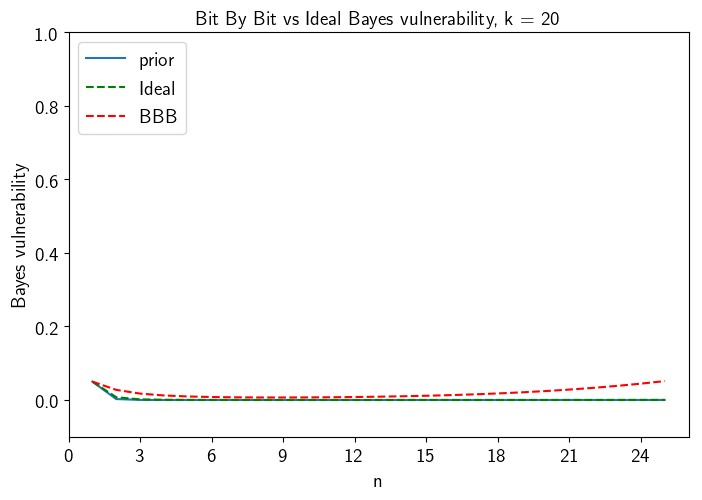

In [50]:
n_range = 25
k = 20
graph_it_vs(n_range, k, df20vs)

k = 20, n ranging from 1 - 100

In [35]:
n_range = 100
k = 20
M = M20
df20n100vs = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df20n100vs

,n,prior,postIdeal,postBBB
0,1,5.0000000000e-02,0.0500000000000000,0.0500000000000000
1,2,2.5000000000e-03,0.00750000000000000,0.0275000000000000
2,3,1.2500000000e-04,0.00162500000000000,0.0173750000000000
3,4,6.2500000000e-06,0.000468750000000000,0.0122937500000000
4,5,3.1250000000e-07,0.000169062500000000,0.00955343750000000
5,6,1.5625000000e-08,7.31718750000000e-5,0.00803360937500000
6,7,7.8125000000e-10,3.69476562500000e-5,0.00721576484375000
7,8,3.9062500000e-11,2.13216796875000e-5,0.00684438933593750
8,9,1.9531250000e-12,1.38423066406250e-5,0.00678974455273438
9,10,9.7656250000e-14,9.98511357421875e-6,0.00698749906162109


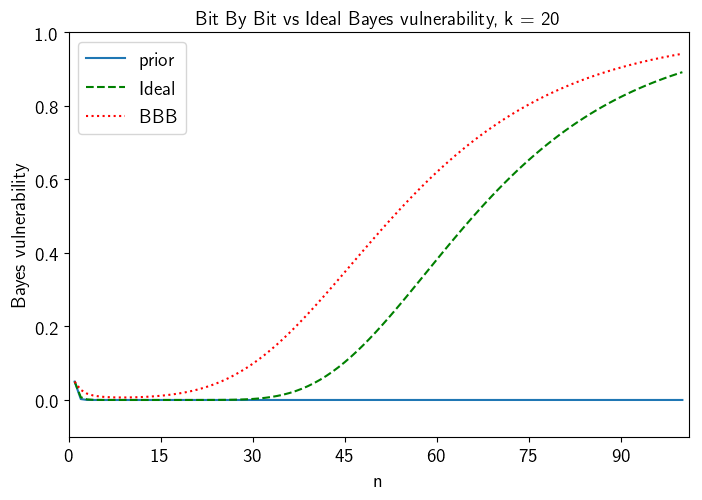

In [36]:
graph_it_vs(n_range, k, df20n100vs)

In [27]:
n_range = 500
k = 128
M = M128
df128vs = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
df128vs

,n,prior,postIdeal,postBBB
0,1,7.8125000000e-03,0.00781250000000000,0.00781250000000000
1,2,6.1035156250e-05,0.000183105468750000,0.000915527343750000
2,3,4.7683715820e-07,6.19888305664063e-6,0.000140666961669922
3,4,3.7252902985e-09,2.79396772384644e-7,2.66544520854950e-5
4,5,2.9103830457e-11,1.57451722770929e-8,5.95903838984668e-6
5,6,2.2737367544e-13,1.06479092210066e-9,1.52537609210412e-6
6,7,1.7763568394e-15,8.40092440057560e-11,4.37551106458045e-7
7,8,1.3877787808e-17,7.57498230807840e-12,1.38402612079314e-7
8,9,1.0842021725e-19,7.68402377317179e-13,4.76770516589673e-8
9,10,8.4703294725e-22,8.66070546374598e-14,1.77096942085104e-8


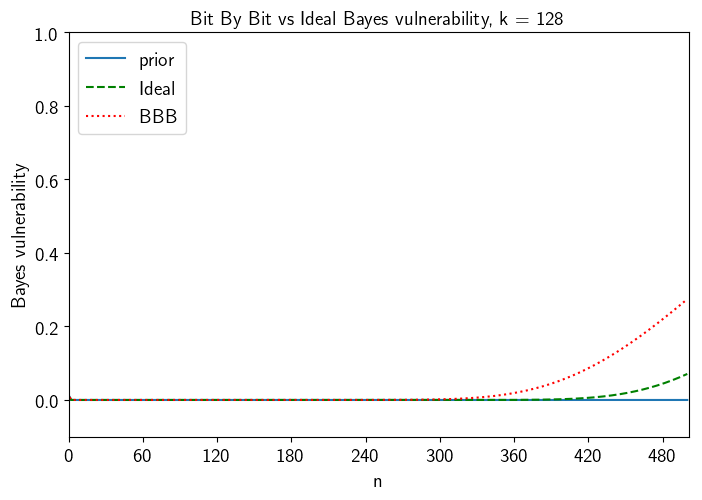

In [31]:
graph_it_vs(n_range, k, df128vs)

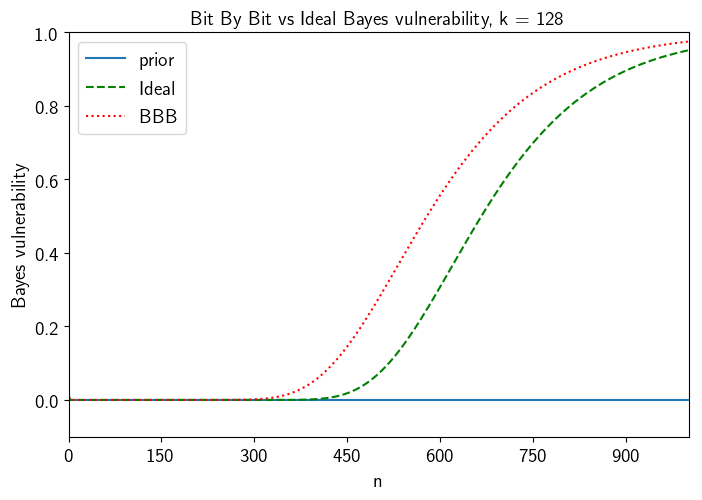

In [39]:
n_range = 1000
k = 128
M = M128
df128vs1000 = df_uni_ore_idealvsBBB_bayes(n_range, k, M)
graph_it_vs(n_range, k, df128vs1000)

In [104]:
n_range = 400
k = 128
M = M128
df = df_uni_ore_idealvsBBB_bayes(n_range, k, M)

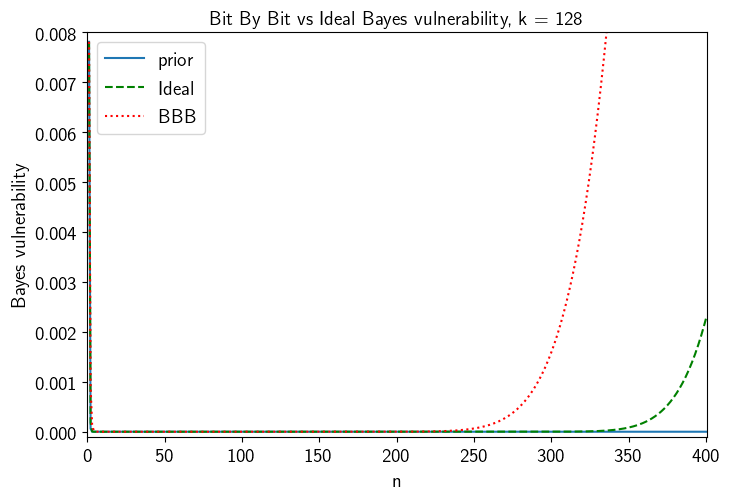

In [105]:
zoom_graph_it_vs(n_range, k, df)

In [106]:
n_range = 50
k = 8
M = bit_pattern_fork(k, k)
df = df_uni_ore_idealvsBBB_bayes(n_range, k, M)

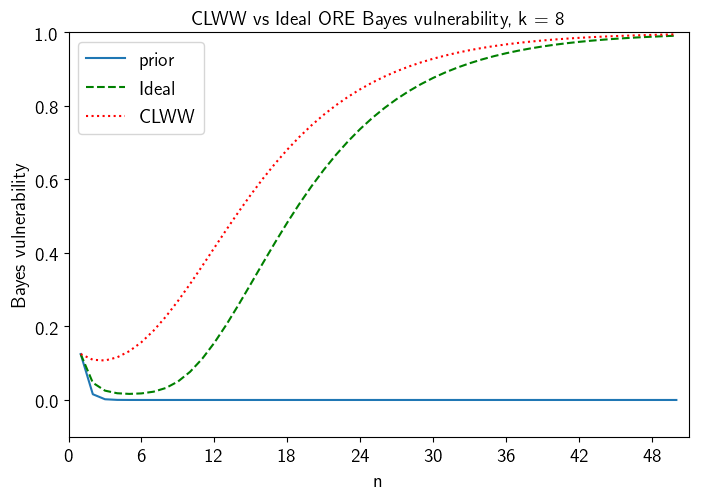

In [16]:
graph_it_vs(n_range, k, df8)

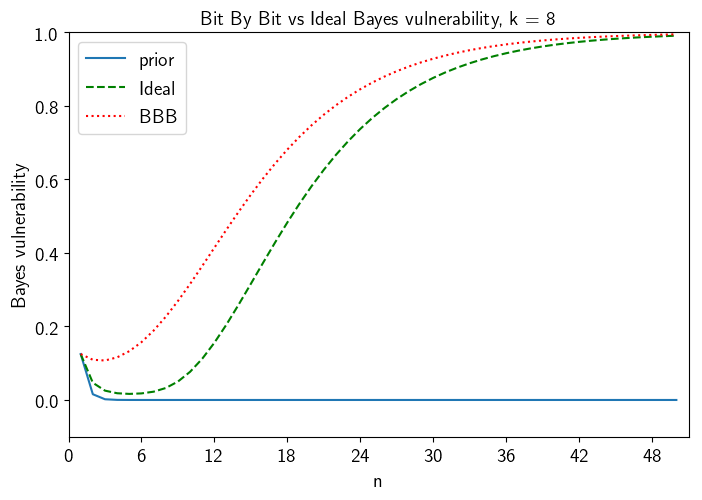

In [107]:
graph_it_vs(n_range, k, df)

In [39]:
def graph_it_bayes(n_range, k, df):
    ax = plt.figure().gca()
    plt.plot('n', 'prior', 
             data=df,
             label="prior")
    plt.plot('n', 'posterior',
             color='green',
             data=df,
             linestyle='--',
             marker='', 
             label="posterior")
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('n')
    plt.xlim(left = 0, right = n_range+1)
    plt.ylabel('Bayes vulnerability')
    plt.ylim(bottom=-.1, top = 1)
    
    plt.title('Bit By Bit Bayes vulnerability, k = {}'.format(k))
    plt.legend(loc='upper left') # legend adjusted so it doesn't run into annotations
    plt.show()
    plt.close()

In [42]:
n_range = 25
k = 20
df_20BBBbayes = df_uni_ore_bbb_bayes(n_range, k, M20)
df_20BBBbayes

,n,prior,posterior
0,1,5.0000000000e-02,0.0500000000000000
1,2,2.5000000000e-03,0.0275000000000000
2,3,1.2500000000e-04,0.0173750000000000
3,4,6.2500000000e-06,0.0122937500000000
4,5,3.1250000000e-07,0.00955343750000000
5,6,1.5625000000e-08,0.00803360937500000
6,7,7.8125000000e-10,0.00721576484375000
7,8,3.9062500000e-11,0.00684438933593750
8,9,1.9531250000e-12,0.00678974455273438
9,10,9.7656250000e-14,0.00698749906162109


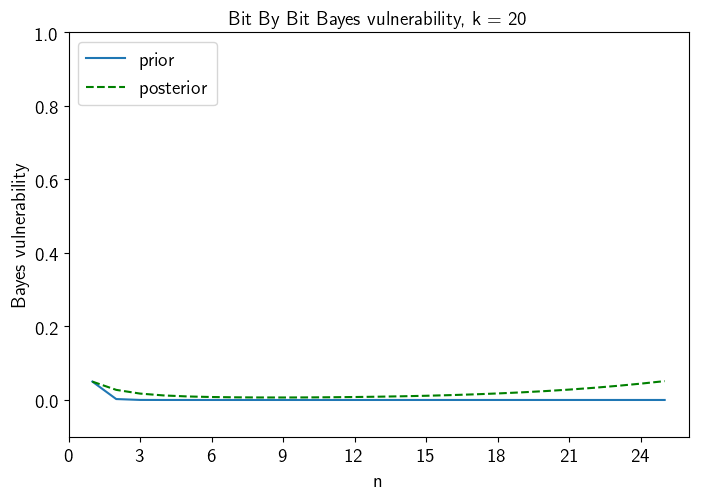

In [43]:
graph_it_bayes(n_range, k, df_20BBBbayes)

## For Presentation
Comparing Ideal ORE and BbB ORE

This loop checks if my equation matches the Kuifje output. For k from 3 - 16 and n = 4, 5, it matches.

In [18]:
for k in range(3, 17):
    print("k: ", k)
    M = bit_pattern_fork(k, k)
    print(M)
    n = 4
    print("n: ", n)
    print("post: ", uni_ore_bbb_bayes(n, k, M))
    n = 5
    print("n: ", n)
    print("post: ", uni_ore_bbb_bayes(n, k, M))

k:  3
     0    1    2    3
0  0.0  1.0  2.0  1.0
n:  4
post:  0.802469135802469
n:  5
post:  0.868312757201646
k:  4
     0    1    2    3    4
0  0.0  1.0  2.0  2.0  1.0
n:  4
post:  0.488281250000000
n:  5
post:  0.586914062500000
k:  5
     0    1    2    3    4    5
0  0.0  1.0  3.0  4.0  3.0  1.0
n:  4
post:  0.414400000000000
n:  5
post:  0.489920000000000
k:  6
     0    1    2    3    4    5    6
0  0.0  1.0  3.0  5.0  5.0  3.0  1.0
n:  4
post:  0.264660493827161
n:  5
post:  0.308770576131687
k:  7
     0    1    2    3    4    5    6    7
0  0.0  1.0  3.0  6.0  8.0  7.0  4.0  1.0
n:  4
post:  0.187838400666389
n:  5
post:  0.223180817516511
k:  8
     0    1    2    3    4     5    6    7    8
0  0.0  1.0  3.0  6.0  9.0  10.0  8.0  4.0  1.0
n:  4
post:  0.115966796875000
n:  5
post:  0.132781982421875
k:  9
     0    1    2    3     4     5     6     7    8    9
0  0.0  1.0  4.0  9.0  15.0  19.0  18.0  12.0  5.0  1.0
n:  4
post:  0.112940100594422
n:  5
post:  0.124489830479

In [ ]:
p = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'BbBn4': [0.8024691358024691, 0.48828125, 0.4144, 0.2646604938271605, 0.18783840066638902, 0.115966796875, 0.11294010059442158, 0.0849, 0.06700361997131343, 0.04846643518518518, 0.04064983719057456, 0.03084652228238234, 0.023881481481481483, 0.0184478759765625], #k = 15 is confusing
    'BbBn5': [0.8683127572016461, 0.5869140625, 0.48992, 0.30877057613168724, 0.22318081751651098, 0.132781982421875, 0.12448983047977104, 0.08941, 0.06911475246971456, 0.04762651105967078, 0.040078859552967604, 0.029230752067590886, 0.021966748971193415, 0.016023635864257812],
    'Idealn4': [0.629629629629630, 0.292968750000000, 0.120000000000000, 0.0578703703703704, 0.0312369845897543, 0.0183105468750000, 0.0114311842706904, 0.00750000000000000, 0.00512260091523803, 0.00361689814814815, 0.00262595847484332, 0.00195231153685964, 0.00148148148148148, 0.00114440917968750],
    'Idealn5': [0.744855967078189, 0.411132812500000, 0.173120000000000, 0.0695730452674897, 0.0321889688820134, 0.0165100097656250, 0.00916188250436078, 0.00541000000000000, 0.00335918435775003, 0.00217415766460905, 0.00145707029219511, 0.00100590527756292, 0.000712427983539095, 0.000515937805175781],
    'Prior4': [0.012345679012345678, 0.00390625, 0.0016, 0.0007716049382716049, 0.00041649312786339027, 0.000244140625, 0.00015241579027587258, 0.0001, 6.830134553650706e-05, 4.8225308641975306e-05, 3.501277966457757e-05, 2.6030820491461892e-05, 1.9753086419753087e-05, 1.52587890625e-05],
    'Prior5': [0.00411522633744856, 0.0009765625, 0.00032, 0.0001286008230452675, 5.9499018266198606e-05, 3.0517578125e-05, 1.6935087808430286e-05, 1e-05, 6.209213230591551e-06, 4.018775720164609e-06, 2.693290743429044e-06, 1.8593443208187064e-06, 1.3168724279835392e-06, 9.5367431640625e-07]
    }
df = pd.DataFrame(data = p)

In [ ]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
#plt.plot('k', 'Prior4', data = df, label="Prior n = 4")
#plt.plot('k', 'Prior5', data = df, label="Prior n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.1, top = 1)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

In [ ]:
plt.figure(figsize=(8, 5.25))
plt.plot('k', 'BbBn4', data = df, label="BbB n = 4")
plt.plot('k', 'BbBn5', data = df, label="BbB n = 5")
plt.plot('k', 'Idealn4', data = df, label="Ideal n = 4")
plt.plot('k', 'Idealn5', data = df, label="Ideal n = 5")
plt.legend(loc='upper right')
plt.xlabel('k')
plt.ylabel('Posterior Bayes Vulnerability')
plt.ylim(bottom=-.00000001, top = 0.08)
plt.xlim(left = 11, right = 16)
plt.title('Bayes vulnerability where n = 4 and 5 under Ideal and Bit By Bit ORE')
plt.show()
plt.close()

In [ ]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
topn5 = [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]
BbBn5 = []
n = 5
for k, t in zip(k_list, topn5):
    BbBn5.append(t / math.pow(k,n))
print(BbBn5)

In [ ]:
k_list = [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
prior5 = []
n = 5
for k in k_list:
    prior5.append(1 / math.pow(k, n))
print(prior5)

In [ ]:
d = {'k': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
    'n4': [65, 125, 259, 343, 451, 475, 741, 849, 981, 1005, 1161, 1185, 1209, 1209], #k = 15 is confusing
    'n5': [211, 601, 1531, 2401, 3751, 4351, 7351, 8941, 11131, 11851, 14881, 15721, 16681, 16802]}
df = pd.DataFrame(data = d)

In [ ]:
df

In [ ]:
plt.plot('k', 'n4', data = df, label='n = 4')
plt.plot('k', 'n5', data = df, label='n = 5')
plt.legend(loc='upper left')
plt.show()
plt.close()

In [ ]:
plt.plot('k', 'n4', data = df, label='n4')
plt.legend(loc='upper left')
plt.show()
plt.close()